In [61]:
import pandas as pd
import io
import uuid
import datetime
import pathlib
from fabric import Connection
import os
import ast
import throughputExtraction
import pandas
from index import *

cur_dir=os.getcwd() # save current directory to save the generated CSV files
print(cur_dir)

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Set display width to None for unlimited
pd.set_option('display.max_colwidth', None)  # Show full content of each column





C:\Users\Camil\OneDrive\Documents\masters\memoire\flinkImplemProject\src\main\python


In [62]:
# location = "nancy"
# node = "grouille-1"
# c1 = Connection(host='ccaulier@access.grid5000.fr')
# # print(c1.run("hostname"))
# c2 = Connection(host='ccaulier@{}'.format(location), gateway=c1)
# # print(c2.run("hostname"))
# c = Connection(host='ccaulier@{}'.format(node), gateway=c2)
# c =c2

In [63]:

n_window = 360
n_elements_per_window = 100000
# pathlib.Path(experimentDirectory).mkdir(exist_ok=True, parents=True)
n_experiments = 5
start_experirment = 0
source_parallelism = 6
main_parallelism = 6
aggregator_parallelism = 1


experimentName = "%s_w%s_s%s_p%s_a%s" % (n_elements_per_window, n_window,  source_parallelism, main_parallelism, aggregator_parallelism)
experimentDirectory = "%s/experiments/experiment_%s/" % (cur_dir,experimentName)
dataDirectory = "param_100000_1440.csv"


In [64]:
import pandas as pd
import re


def parse_data_javaSource(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    metric_pattern = re.compile(r'^metric:(.+)$')
    runtime_pattern = re.compile(r'Job Runtime: (\d+) ms')

    data = []
    current_runtime = None  # To store runtime for next metric entry

    for line in lines:
        runtime_match = runtime_pattern.search(line)
        if runtime_match:
            current_runtime = int(runtime_match.group(1))

        metric_match = metric_pattern.match(line)
        if metric_match and current_runtime is not None:
            metric_data = metric_match.group(1).split(',')
            metric_data.insert(5,"javaSource")
            metric_data[8], metric_data[9] = metric_data[9], metric_data[8]


            if(metric_data[10] == "1.0E-15"):
                metric_data[10] = "0.0"

            metric_data.append(current_runtime)  # Append the runtime to metric data
            data.append(metric_data)
            # print(metric_data)
            current_runtime = None  # Reset runtime after adding to data

    # Define DataFrame column names
    column_names = ['Operator', 'Duration', 'MainParallelism', 'HybridParallelism', 'Choices', 'CSVSource','distributionType','eventPerWindow','keySize','amountOfWindows','skew', 'Runtime (ms)']
    # Create DataFrame
    df = pd.DataFrame(data, columns=column_names)
    return df

#metrics >subtask_ids subtask , accumulate


def save_dataframe_to_csv(df, output_path):
    df.to_csv(output_path, index=False)

# n_experiments = 3


# main_df.to_csv(main_df)

In [65]:
import throughputExtraction
main_df = pd.DataFrame()

for i in range(n_experiments):
    experimentFile = f"{experimentDirectory}{i}/output.dat"
    throughputFile = f"{experimentDirectory}{i}/throughput.dat"

    throughputDF = throughputExtraction.extract_all_job_data(throughputFile)
    throughputDF = throughputExtraction.replace_with_nan(throughputDF)

    df = parse_data_javaSource(experimentFile)

    print(throughputDF.columns.tolist())
    print(df.columns.tolist())

    df['skew'] = df['skew'].astype(float)
    df['Operator'] = df['Operator'].astype(str)
    df[keysizeString] = df[keysizeString].astype(int)

    throughputDF['skew'] = throughputDF['skew'].astype(float)
    throughputDF['Operator'] = throughputDF['Operator'].astype(str)
    throughputDF[keysizeString] = throughputDF[keysizeString].astype(int)

    df = pd.merge(df, throughputDF, on=[operatorString, skewString, keysizeString], suffixes=('_exp', '_thru'))

    save_dataframe_to_csv(df, f"{experimentDirectory}{i}/output.csv")

    # Concatenate into the main DataFrame
    main_df = pd.concat([main_df, df], ignore_index=True)

# Display the final concatenated DataFrame
print(main_df)


,Operator,Duration,MainParallelism,HybridParallelism,Choices,CSVSource,distributionType,eventPerWindow,keySize,amountOfWindows,skew,runtime
0,MeanHybrid,18274,3,3,0,javaSource,zipf,100000,1,360,0.0,16209
1,MeanHybrid,15326,3,3,0,javaSource,zipf,100000,1,360,0.7,14619
2,MeanHybrid,13270,3,3,0,javaSource,zipf,100000,1,360,1.4,11801
3,MeanHybrid,13311,3,3,0,javaSource,zipf,100000,1,360,2.1,12609
4,MeanHybrid,15239,3,3,0,javaSource,zipf,100000,2,360,0.0,14590
5,MeanHybrid,15239,3,3,0,javaSource,zipf,100000,2,360,0.7,13354
6,MeanHybrid,15251,3,3,0,javaSource,zipf,100000,2,360,1.4,13574
7,MeanHybrid,15230,3,3,0,javaSource,zipf,100000,2,360,2.1,12727
8,MeanHybrid,19235,3,3,0,javaSource,zipf,100000,3,360,0.0,17092
9,MeanHybrid,19260,3,3,0,javaSource,zipf,100000,3,360,0.7,16809


In [66]:
main_df

In [67]:
import matplotlib.pyplot as plt

# Group data and calculate mean and range of runtime
main_df.drop(columns=['Duration'])
main_df['amountOfWindows'] = main_df['amountOfWindows'].astype(int)
main_df['eventPerWindow'] = main_df['eventPerWindow'].astype(int)
main_df['Runtime (ms)'] = main_df['Runtime (ms)'].astype(float)

main_df['Throughput (events/sec)'] = (main_df['amountOfWindows'] * main_df['eventPerWindow']) / (main_df['Runtime (ms)'] / 1000)

grouped = main_df.groupby(['Operator', 'MainParallelism', 'HybridParallelism', 'Choices', 'CSVSource','distributionType','eventPerWindow','keySize','amountOfWindows','skew'])
runtime_stats = grouped['Runtime (ms)'].agg(['mean runtime', lambda x: x.max() - x.min()]).rename(columns={'<lambda_0>': 'range'}).reset_index()
throughput_stats = grouped['Throughput (events/sec)'].agg(['mean throughput', lambda x: x.max() - x.min()]).rename(columns={'<lambda_0>': 'range'})

# Combine both metrics into a single DataFrame
combined_stats = pd.concat([runtime_stats, throughput_stats], axis=1, keys=['Runtime', 'Throughput'])

# Reset index for a tidy DataFrame
combined_stats.reset_index(inplace=True)



,Operator,MainParallelism,HybridParallelism,Choices,CSVSource,distributionType,eventPerWindow,keySize,amountOfWindows,skew,mean throughput,range throughput
0,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,0.0,3.125282e+06,5.666346e+05
1,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,0.7,3.271886e+06,7.483199e+05
2,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,1.4,3.489469e+06,1.056406e+06
3,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,2.1,3.893118e+06,8.543707e+05
4,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,0.0,3.362887e+06,1.296254e+06
5,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,0.7,3.653018e+06,3.386400e+05
6,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,1.4,3.998082e+06,1.233050e+06
7,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,2.1,3.872651e+06,1.953483e+06
8,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,3,360,0.0,2.131174e+06,5.434712e+05
9,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,3,360,0.7,2.532947e+06,2.686777e+05


In [68]:
#PLOT FOR RUNTIME
combined_stats['skew'] = combined_stats['skew'].astype(float)
listOfKeySizes = [27**1, 27**2, "~19.5k"]
sorted_runtime_stats = combined_stats.sort_values(by='skew')
for i in range(1,3+1):
    keysize_2_data = combined_stats[combined_stats['keySize'] == str(i)].sort_values(by='skew')


    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            # print(group['skew'])
            ax.errorbar(group['skew'], group['mean'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Mean Runtime (ms)')
    ax.set_title('Mean Runtime for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
     # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    # plt.show()
    plt.savefig(experimentDirectory+"plot{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()



,Operator,MainParallelism,HybridParallelism,Choices,CSVSource,distributionType,eventPerWindow,keySize,amountOfWindows,skew,mean runtime,range runtime
0,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,0.0,11565.0,1987.0
1,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,0.7,11071.6,2604.0
2,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,1.4,10463.0,3627.0
3,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,1,360,2.1,9313.6,2096.0
4,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,0.0,10874.2,4138.0
5,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,0.7,9863.8,912.0
6,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,1.4,9125.2,3111.0
7,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,2,360,2.1,9581.4,5197.0
8,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,3,360,0.0,17033.8,4303.0
9,MeanCAMRoundRobin,6,0,3,javaSource,zipf,100000,3,360,0.7,14230.2,1514.0


In [69]:
#PLOTS FOR THROUGHPUT
# Plot for Throughput
combined_stats['skew'] = combined_stats['skew'].astype(float)
listOfKeySizes = [27**1, 27**2, "~19.5k"]
combined_stats = combined_stats.sort_values(by='skew')

for i in range(1, 3+1):
    keysize_2_data = combined_stats[combined_stats['keySize'] == str(i)].sort_values(by='skew')

    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            ax.errorbar(group['skew'], group['mean'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Throughput (events/sec)')
    ax.set_title('Throughput for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
    # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    plt.savefig("plot_throughput_{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


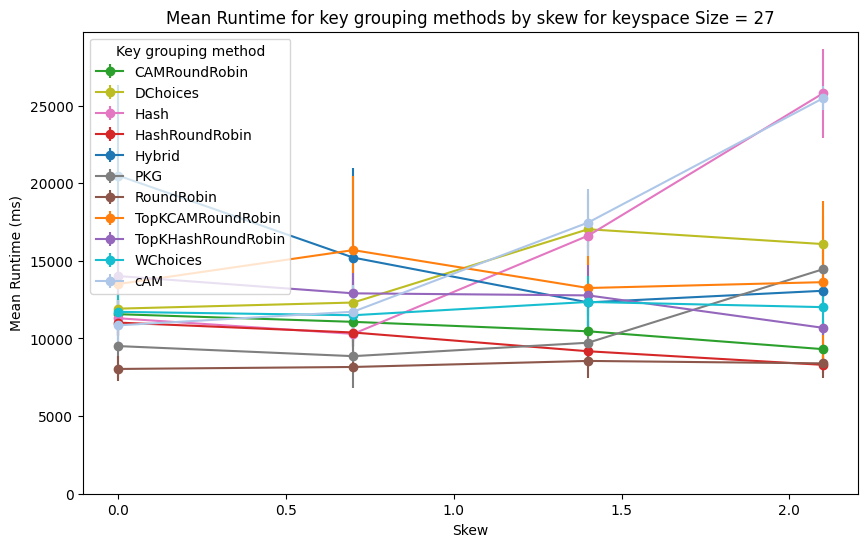

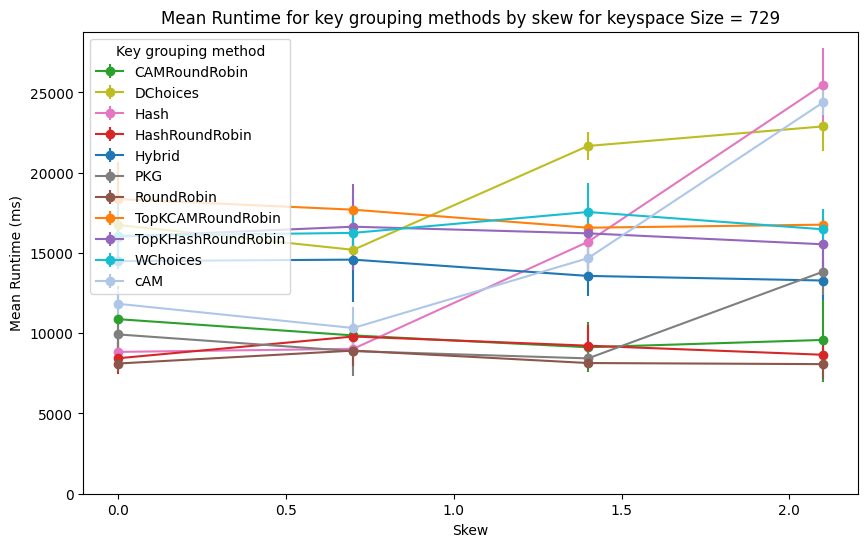

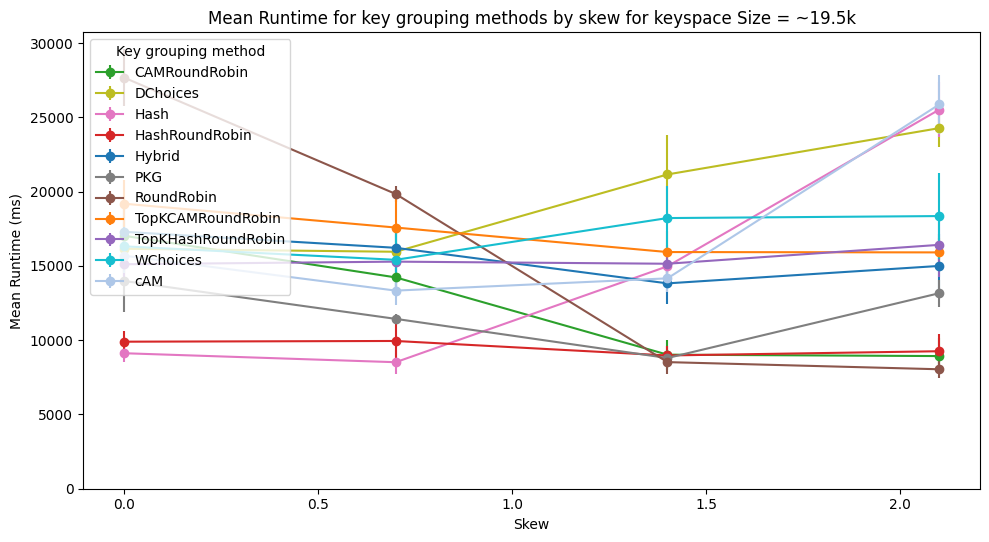

In [70]:
#PLOTS FOR GINI COEFFICIENT OF INTPUT
loadDistribution = throughputExtraction.select_best_rows(combined_stats, ['PartialFunctionNumRecordsIn'])
loadDistribution['gini_coefficient'] = loadDistribution['PartialFunctionNumRecordsIn'].apply(gini_coefficient)


for i in range(1, 3+1):
    keysize_2_data = loadDistribution[loadDistribution['keySize'] == str(i)].sort_values(by='skew')

    # Set up the plotting area
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot data for each operator
    for name, group in keysize_2_data.groupby('Operator'):
        if not group.empty:
            ax.errorbar(group['skew'], group['mean'], yerr=group['range']/2, fmt='-o', label=f'{name[4:]}')
        else:
            print(f"No data for Operator {name} with keySize == {i}")

    # Label the axes and the plot
    ax.set_xlabel('Skew')
    ax.set_ylabel('Throughput (events/sec)')
    ax.set_title('Throughput for key grouping methods by skew for keyspace Size = {}'.format(listOfKeySizes[i-1]))
    ax.legend(title='Key grouping method', loc='upper left')
    # Set the y-axis to start at 0
    ax.set_ylim(bottom=0)

    # Show the plot
    plt.savefig("plot_throughput_{}.png".format(i))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


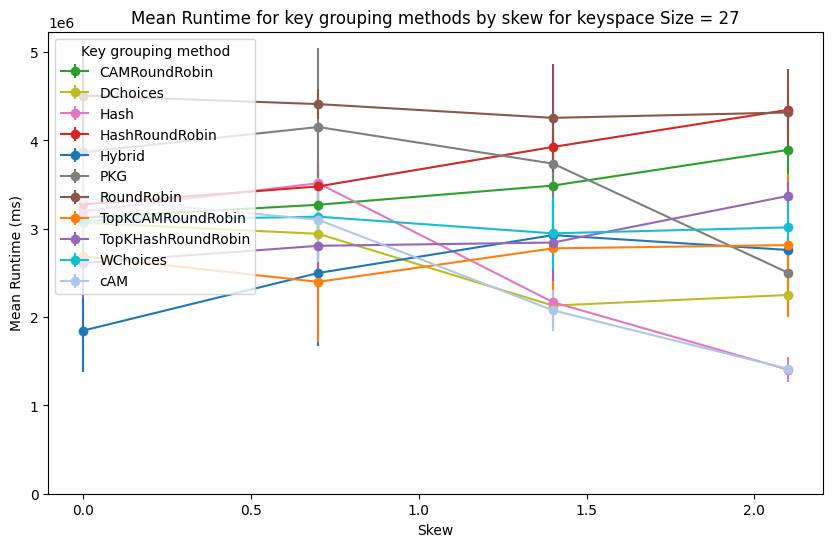

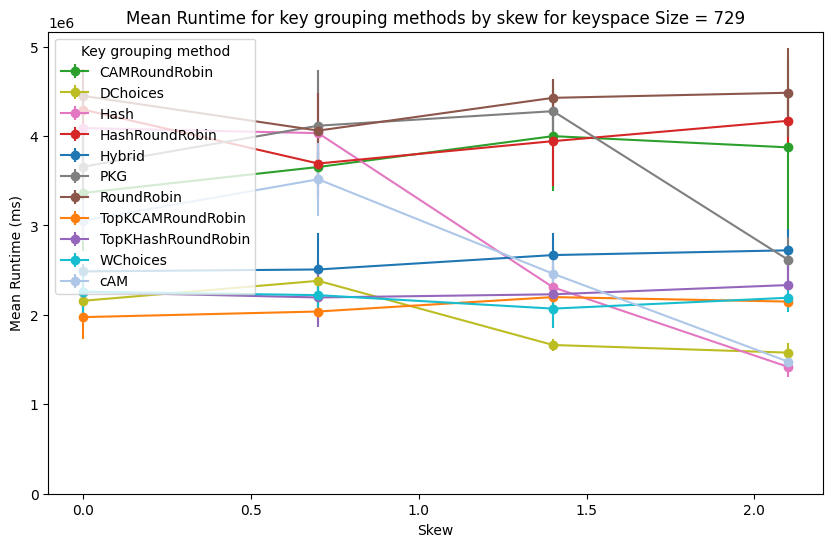

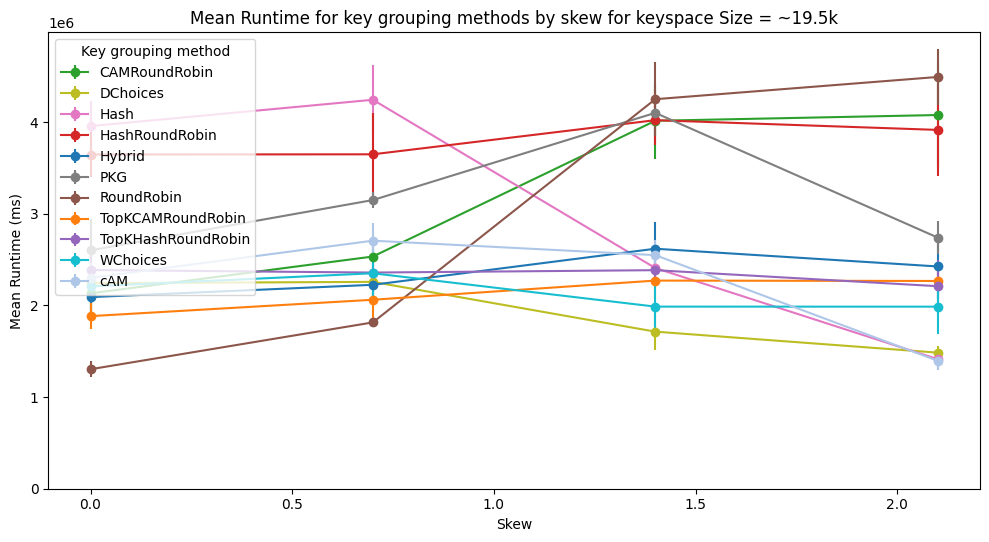

In [71]:
#PLOTS FOR INPUT TOTAL OUTPUT  /TOTAL THROUGHPUT